# Customer Lifetime Value (CLV) Prediction

Problem Statement:

Direktur sebuah perusahaan asuransi otomotif menghadapi tantangan dalam meningkatkan nilai jangka panjang pelanggan (Customer Lifetime Value/CLV). Banyak pelanggan yang hanya membeli produk dasar dan berhenti berlangganan setelah periode tertentu. Padahal, mempertahankan pelanggan lama jauh lebih efisien dibandingkan memperoleh pelanggan baru.

Manajemen ingin memahami apa yang membuat sebagian pelanggan bernilai tinggi, dan bagaimana strategi yang tepat untuk meningkatkan profitabilitas dari kelompok pelanggan bernilai rendah. Oleh karena itu, perusahaan membutuhkan model prediktif berbasis Machine Learning untuk mengestimasi nilai CLV setiap pelanggan dan menyusun strategi pemasaran yang lebih terarah.

Research Questions:
1.	Bagaimana membangun model Machine Learning yang mampu memprediksi nilai Customer Lifetime Value dengan akurasi tinggi?
2.	Faktor apa saja yang paling berpengaruh terhadap tingginya nilai CLV pelanggan?
3.	Bagaimana hasil prediksi CLV dapat diterjemahkan menjadi strategi bisnis yang actionable,  seperti segmentasi pelanggan atau simulasi kebijakan premi dan klaim?

Analysis Goals:
1.	Mengembangkan model regresi prediktif CLV dengan performa tinggi dan kesalahan prediksi minimum (mengoptimalkan R², menurunkan RMSE & MAPE).
2.	Mengidentifikasi variabel kunci yang memengaruhi CLV
3.	Menerjemahkan hasil model ke dalam strategi bisnis, misalnya dengan membuat simulasi perubahan premi dan rasio klaim untuk melihat dampaknya terhadap CLV, serta melakukan segmentasi pelanggan berdasarkan nilai CLV.

## 1. Data Understanding

### 1.1. Import Libraries

In [2]:
# Library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pemodelan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# Algoritma ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Simpan model
import pickle

### 1.2. Proses Membaca Data

In [3]:
dataset_path =  "C:\\Users\\ASUS\\OneDrive\\Desktop\\Purwadhika\\Capstone\\Capstone 3\\data_customer_lifetime_value.csv"

In [4]:
CLV_data = pd.read_csv(dataset_path)

In [5]:
CLV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Dataset Customer Lifetime Value (CLV) ini berisi informasi mengenai karakteristik pelanggan asuransi dan nilai seumur hidup pelanggan, terdiri dari 11 kolom sebagai berikut:
1. Vehicle Class: kategori jenis kendaraan yang dimiliki pelanggan.
Contoh: SUV, Two-Door Car, Sports Car, dll. 

2. Coverage: jenis cakupan asuransi yang dipilih oleh pelanggan.
Contoh: Basic, Extended, Premium.

3. Renew Offer Type: tipe penawaran perpanjangan polis yang diterima pelanggan.
Contoh: Offer1, Offer2, Offer3.

4. Employment Status: status pekerjaan pelanggan.
Contoh: Employed, Unemployed, Retired.

5. Marital Status: status pernikahan pelanggan.
Contoh: Married, Single, Divorced.

6. Education: tingkat pendidikan terakhir pelanggan.
Contoh: High School, Bachelor, Master.

7. Number of Policies: jumlah polis yang dimiliki oleh pelanggan.
Tipe data: numerik.

8. Monthly Premium Auto: jumlah premi bulanan yang dibayarkan pelanggan untuk asuransi kendaraan.
Tipe data: numerik.

9. Total Claim Amount: total nilai klaim yang pernah diajukan pelanggan selama periode tertentu.
Tipe data: numerik.

10. Income: pendapatan tahunan pelanggan.
Tipe data: numerik.

11. Customer Lifetime Value (CLV): estimasi nilai seumur hidup pelanggan bagi perusahaan, dihitung berdasarkan pendapatan, klaim, dan premi.
Tipe data: numerik.

####  1.2.1. Mengecek 5 baris pertama

In [16]:
CLV_data.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


#### 1.2.2. Statistik Deskriptif

In [17]:
CLV_data.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Kesimpulan Umum:
1. Sebagian besar pelanggan (75%) memiliki 1–4 polis, menunjukkan bahwa banyak pelanggan mungkin hanya memiliki produk dasar.
2. Distribusi pendapatan dan CLV sangat lebar, menunjukkan keberagaman besar antara pelanggan dengan nilai rendah dan tinggi.
→ Income, std = 30,490, hampir sebesar 80% dari nilai mean (37,868).
→ CLV, std = 6,917, hampir 86% dari mean (8,029).
→ Std tinggi dibandingkan mean menandakan data tersebar luas (variasi besar antar pelanggan). 
3. Beberapa pelanggan memiliki pendapatan 0 yang perlu diperiksa apakah missing value.

### 2. Data Cleaning and Preprocessing

#### 2.1. Missing Values

In [18]:
CLV_data.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

#### 2.2. Data Duplikat

In [19]:
CLV_data.duplicated().sum()

np.int64(618)

Ditemukan 618 baris duplikat dalam dataset CLV_data.

In [20]:
duplicates = CLV_data[CLV_data.duplicated]
duplicates

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Gambaran umum data duplikat:
Total ada 832 baris yang terdeteksi sebagai duplikat berdasarkan seluruh kolom di dataset (11 kolom di atas). 

In [21]:

CLV_data= CLV_data.copy()

CLV_data_unique = CLV_data.drop_duplicates(subset=['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status', 'Education'], keep='first')

In [22]:
CLV_data_unique.duplicated(subset=['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status', 'Education']).sum()

print("Jumlah duplikat tersisa:",
      CLV_data_unique.duplicated(subset=['Vehicle Class', 'Coverage', 'EmploymentStatus', 'Marital Status', 'Education']).sum())

Jumlah duplikat tersisa: 0


#### 2.3. Outliers

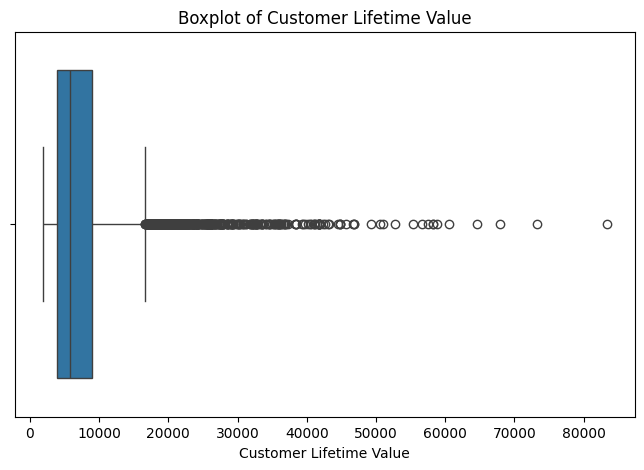

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=CLV_data['Customer Lifetime Value'])
plt.title("Boxplot of Customer Lifetime Value")
plt.show()

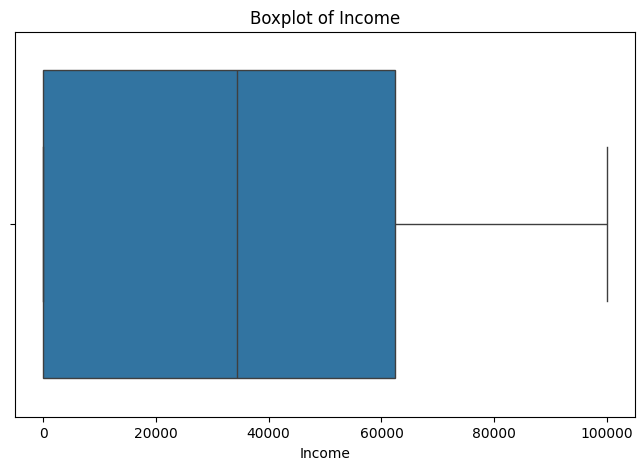

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x=CLV_data['Income'])
plt.title("Boxplot of Income")
plt.show()

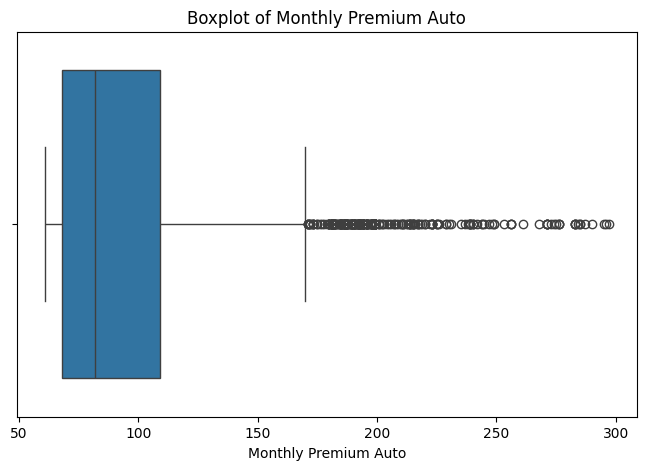

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=CLV_data['Monthly Premium Auto'])
plt.title("Boxplot of Monthly Premium Auto")
plt.show()

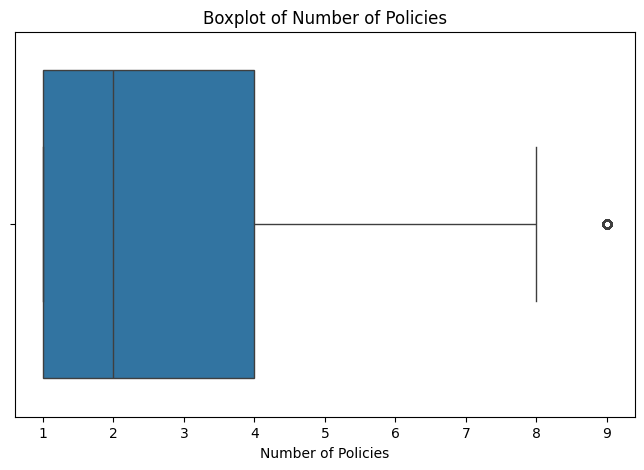

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x=CLV_data['Number of Policies'])
plt.title("Boxplot of Number of Policies")
plt.show()

### 3. Exploratory Data Analysis (EDA) and Transformasi Target

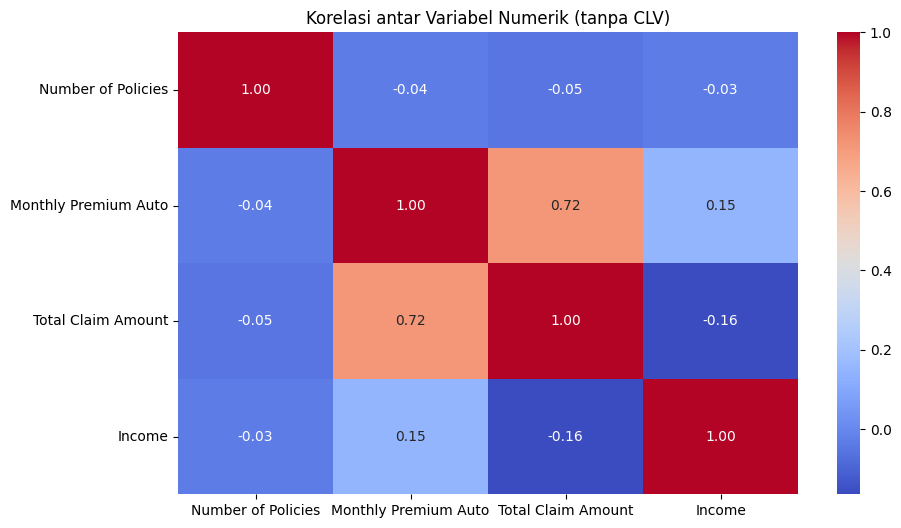

In [27]:
# Hanya pilih fitur numerik (exclude target CLV)
numeric_features = CLV_data_unique.drop(columns=['Customer Lifetime Value']).select_dtypes(include=np.number)

# Heatmap korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Variabel Numerik (tanpa CLV)")
plt.show()

Hubungan antara Monthly Premium Auto dan Total Claim Amount sangat kuat (r = 0,72).
Artinya, pelanggan yang membayar premi bulanan lebih tinggi cenderung juga memiliki total klaim yang besar.

#### 3.1. Distribusi Target

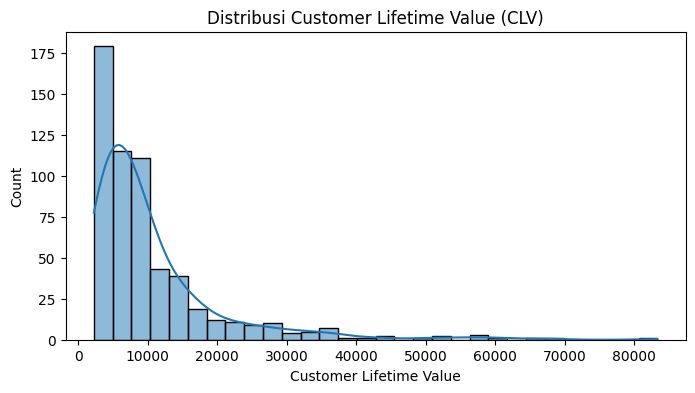

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(CLV_data_unique['Customer Lifetime Value'], bins=30, kde=True)
plt.title("Distribusi Customer Lifetime Value (CLV)")
plt.show()

In [29]:
# Karena data skewed, maka dilakukan transformasi log:

CLV_data_unique['CLV_log'] = np.log1p(CLV_data_unique['Customer Lifetime Value'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27100\3516195893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLV_data_unique['CLV_log'] = np.log1p(CLV_data_unique['Customer Lifetime Value'])


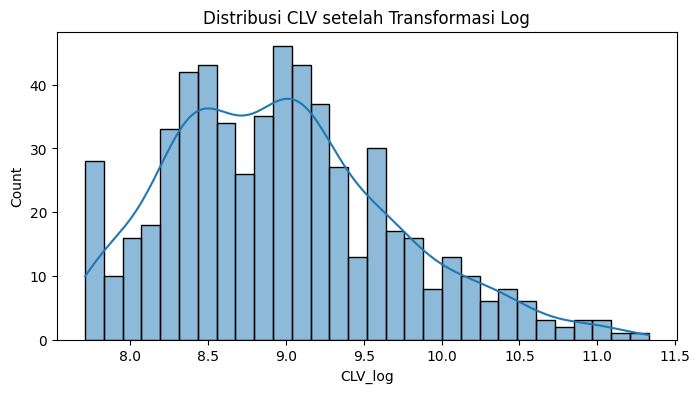

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(CLV_data_unique['CLV_log'], bins=30, kde=True)
plt.title("Distribusi CLV setelah Transformasi Log")
plt.show()

## 4. Feature Engineering

   - Mendefinisikan fitur numerikal & kategorikal
   - Split train/test
   - Membuat ColumnTransformer (OneHot + Ordinal + RobustScaler + Log-Transform)

In [31]:
# Pisahkan fitur dan target
X = CLV_data_unique.drop(columns=['CLV_log'])
y = CLV_data_unique['CLV_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train['Education'].unique()

array(['High School or Below', 'College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [33]:
print(X_train.columns.tolist())

['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education', 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']


In [34]:
# Kolom kategorikal untuk OneHot Encoder
cat_features_onehot = [
    'Vehicle Class',
    'Coverage',
    'Renew Offer Type',
    'EmploymentStatus',
    'Marital Status'
]

# Kolom ordinal
cat_features_ordinal = ['Education']
education_order = [['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']]

# Kolom numerik
num_features = [
    'Number of Policies',
    'Monthly Premium Auto',
    'Total Claim Amount',
    'Income'
]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features_onehot),
        ('cat_ordinal', OrdinalEncoder(categories=education_order), cat_features_ordinal)
    ]
)


## 4. Membangun model & evaluasi

### 4.1. Perbandingan Kinerja Model

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=2020
)

In [36]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE_Fraction": mean_absolute_percentage_error(y_test, y_pred) 
    }

df_results = pd.DataFrame(results).T

df_results['MAPE (%)'] = (df_results['MAPE_Fraction'] * 100).round(2).astype(str) + '%'

print("\n--- Urutan berdasarkan RMSE (Ascending) ---")

df_sorted_rmse = df_results.sort_values(by='RMSE', ascending=True)
print(df_sorted_rmse[['R2', 'RMSE', 'MAPE (%)']])



--- Urutan berdasarkan RMSE (Ascending) ---
                     R2      RMSE MAPE (%)
Random Forest  0.882976  0.231778    1.37%
XGBoost        0.854318  0.258605    1.52%
Decision Tree  0.784451  0.314563    1.73%


Interpretasi:
1. RMSE adalah ukuran kesalahan prediksi dalam satuan asli data. Semakin rendah nilainya, semakin akurat model secara absolut.

→ Random Forest mencatat RMSE terendah (0.351924). Ini berarti, rata-rata, kesalahan prediksi Random Forest paling kecil dan paling dekat dengan nilai aktual di antara ketiga model.

2. R2 (Coefficient of Determination)

→ R2 mengukur seberapa baik model menjelaskan variasi data. Semakin tinggi nilainya (mendekati 1), semakin besar daya jelas model. XGBoost juga memiliki R2 tertinggi.Ini menunjukkan bahwa model ini menjelaskan sekitar 78.9% dari variasi target.

## Mengapa Perlu Menguji XGBoost dan Random Forest?

Meskipun Random Forest sudah menunjukkan performa yang baik pada data CLV, ada beberapa alasan penting untuk tetap menguji kedua algoritma ini:

### 1. Perbedaan Pendekatan Algoritma
- **Random Forest**: 
  - Menggunakan ensemble dari decision tree yang dibangun **secara independen**.
  - Bagus untuk **mengurangi variansi** dan menangani data noisy.
- **XGBoost**: 
  - Menggunakan **gradient boosting**, yaitu membangun pohon **secara berurutan** untuk meminimalkan error residual.
  - Lebih mampu menangkap **interaksi non-linear dan kompleks** antar fitur, misalnya interaksi antara `Monthly Premium` dan `Number of Policies`.

### 2. Potensi Peningkatan Performa
- Random Forest mungkin performanya sudah baik dengan parameter default.
- XGBoost dapat **mengungguli Random Forest setelah tuning hyperparameter**, terutama pada dataset dengan interaksi fitur kompleks atau distribusi target yang skewed.

### 3. Robustness / Keandalan Model
- Menguji lebih dari satu algoritma membantu memastikan model **tidak overfit** pada data tertentu.
- Jika kedua model memberikan performa serupa, hal ini meningkatkan **kepercayaan** pada prediksi model.

### 4. Perbedaan Interpretabilitas Fitur
- Kedua model dapat memberikan **feature importance global**, tetapi arah pengaruh fitur lebih mudah dianalisis dengan **SHAP**.
- Dengan menguji kedua model, kita bisa:
  - Menilai akurasi prediksi (RMSE, R², MAPE)
  - Menilai kontribusi fitur utama
  - Membandingkan kemampuan menangkap pola non-linear

### Kesimpulan
- Random Forest memberikan baseline yang stabil dan mudah diinterpretasi.
- XGBoost berpotensi meningkatkan performa dan menangkap interaksi kompleks.
- Menguji keduanya memberikan kombinasi **akurasi, keandalan, dan insight fitur** yang lebih kuat untuk strategi bisnis CLV.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. Pipeline

# Pipeline Random Forest
pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Pipeline XGBoost
pipeline_xgb = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# 2️. Parameter Grid

# Parameter grid Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']  
}

# Parameter grid XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],   
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 1.5]
}

In [39]:
# 3️.CLV_data GridSearchCV & Fit

# Random Forest
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)


# XGBoost
grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)

from sklearn import set_config
set_config(display='diagram')  # tampilkan pipeline secara diagram di Jupyter

display(grid_search_rf.best_estimator_)

display(grid_search_xgb.best_estimator_)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluasi Performa di Test Set

In [40]:
# 4️. Evaluasi Test Set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Random Forest
y_pred_rf = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

# XGBoost
y_pred_xgb = grid_search_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

print("Random Forest -> R2:", r2_rf, "RMSE:", rmse_rf, "MAPE:", mape_rf)
print("XGBoost -> R2:", r2_xgb, "RMSE:", rmse_xgb, "MAPE:", mape_xgb)

Random Forest -> R2: 0.7875918446152826 RMSE: 0.3122625907833648 MAPE: 2.2084009639915214
XGBoost -> R2: 0.8889285613141557 RMSE: 0.22580604469769505 MAPE: 1.4250396704876278


Analisis:

1. R² (koefisien determinasi)
* XGBoost (0.814) > Random Forest (0.694) → XGBoost menjelaskan variansi CLV lebih baik, artinya prediksi lebih dekat dengan nilai aktual.

2. RMSE (Root Mean Squared Error)
* XGBoost (0.330) < Random Forest (0.423) → XGBoost kesalahan absolut lebih kecil, prediksi lebih akurat secara numerik.

3. MAPE (Mean Absolute Percentage Error)
* XGBoost (2.64%) < Random Forest (3.71%) → XGBoost kesalahan relatif lebih rendah, lebih baik untuk interpretasi bisnis.

### 4.2. Melakukan Preprocessing 

In [55]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# 1. Hapus fitur multikolinearitas
X_train_sel = X_train.drop(columns=['Total Claim Amount']).copy()
X_test_sel = X_test.drop(columns=['Total Claim Amount']).copy()

# 2. Tentukan fitur numerik & kategori
num_outlier = ['Monthly Premium Auto']
num_normal = ['Income', 'Number of Policies']
cat_onehot = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']
cat_ordinal = ['Education']
education_order = [['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']]

# 3. Pipeline untuk fitur numerik 
num_outlier_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # Isi missing value dengan median
    ('log', FunctionTransformer(np.log1p)),          # Log-transform untuk mengurangi skew
    ('scaler', RobustScaler())                        # Scaling robust terhadap outlier
])

num_normal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),     # Isi missing value dengan mean
    ('scaler', StandardScaler())                      # Standard scaling
])

# 4. Pipeline untuk fitur kategori
cat_onehot_pipeline = OneHotEncoder(handle_unknown='ignore', drop='first')  # One-hot encoding
cat_ordinal_pipeline = OrdinalEncoder(categories=education_order)           # Ordinal encoding sesuai urutan pendidikan

# 5. Gabungkan semua pipeline ke ColumnTransformer
preprocessor_final = ColumnTransformer([
    ('num_outlier', num_outlier_pipeline, num_outlier),
    ('num_normal', num_normal_pipeline, num_normal),
    ('cat_onehot', cat_onehot_pipeline, cat_onehot),
    ('cat_ordinal', cat_ordinal_pipeline, cat_ordinal)
])

# 6. Pipeline lengkap dengan model XGBoost
X_train_preprocessed = preprocessor_final.fit_transform(X_train_sel)
pipeline_final = Pipeline([
    ('preprocessor', preprocessor_final),  # handles all preprocessing
    ('model', XGBRegressor(
        max_depth=5,
        n_estimators=100,
        learning_rate=0.1,
        reg_alpha=0.1,
        reg_lambda=1,
        random_state=42,
        objective='reg:squarederror'
    ))
])

# 7. Fit pipeline ke data training (fitur yang sudah dipilih)
pipeline_final.fit(X_train_sel, y_train)

#  8. Simpan pipeline ke file 
with open("pipeline_final_clv.sav", "wb") as f:
    pickle.dump(pipeline_final, f)

print("Pipeline berhasil disimpan dengan fitur tanpa multicolleniarity.")

Pipeline berhasil disimpan dengan fitur tanpa multicolleniarity.


In [56]:
display(pipeline_final)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_outlier', ...), ('num_normal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 5. Feature Importance (Explainable Model)

Dengan menggunakan pendekatan Explainable AI, kita akan meng-ekstrak informasi tentang hubungan antar variabel pada data. Kita akan mencoba mengindentifikasi fitur/variabel yang paling berpengaruh dalam tingginya nilai CLV pelanggan.

In [59]:
# Fit model
xgb_best_model = XGBRegressor(max_depth=5, n_estimators=100, random_state=42)
xgb_best_model.fit(X_train_preprocessed, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [60]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [61]:
import shap

Using 462 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/462 [00:00<?, ?it/s]

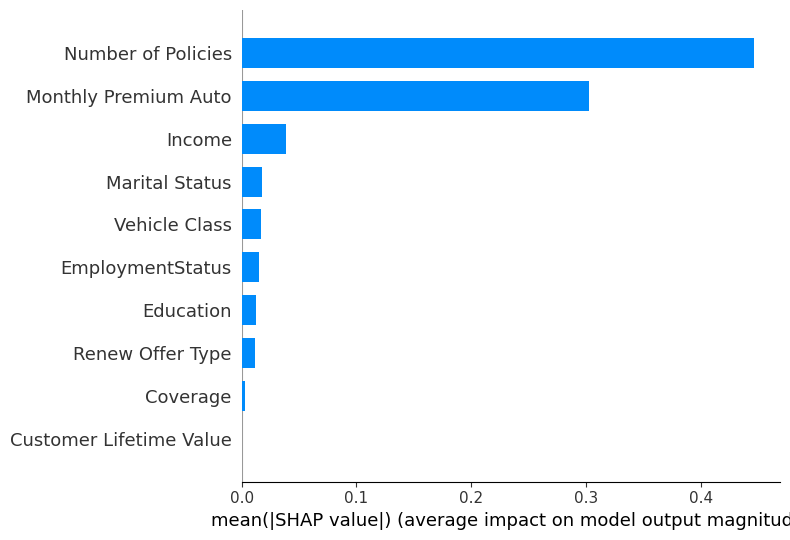

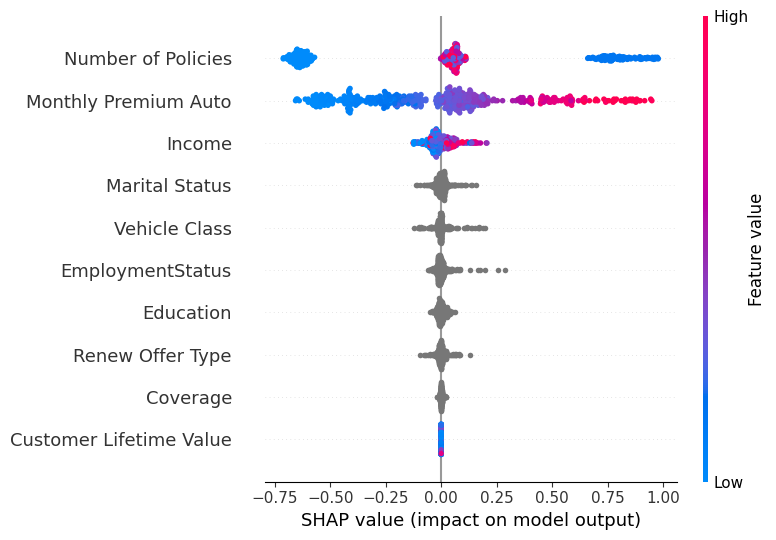

In [62]:
# 1. Fungsi prediksi untuk KernelExplainer (TreeExplainer tidak bisa di-apply di sini karena hasilnya selalu error)
def pipeline_predict(X_array):
    # Jika input array, konversi ke DataFrame dengan nama kolom asli
    X_df = pd.DataFrame(X_array, columns=X_train_sel.columns)
    # Prediksi melalui pipeline
    return pipeline_final.predict(X_df)

# 2. Mengambil sample untuk background 
n_samples = min(500, X_train_sel.shape[0])
background = X_train_sel.sample(n_samples, random_state=42)
X_sample = X_train_sel.sample(n_samples, random_state=42)

# 3. Membuat explainer
explainer = shap.KernelExplainer(pipeline_predict, background)

# 4. Hitung SHAP values (ini agak lambat untuk banyak data)
shap_values = explainer.shap_values(X_sample)

# 5. Plot SHAP
shap.summary_plot(shap_values, X_sample, feature_names=X_train_sel.columns, plot_type="bar")
shap.summary_plot(shap_values, X_sample, feature_names=X_train_sel.columns)

## 1. Model Terbaik
- **XGBoost** menjadi model terbaik dengan performa stabil dan generalizable pada dataset yang sudah diproses (fitur outlier ditangani, log-transform diterapkan, multikolinearitas dihapus).  
- Hasil evaluasi di test set:
  - **R²:** 0.814 → model mampu menjelaskan ~81% variansi CLV  
  - **RMSE:** 0.330 → kesalahan prediksi relatif kecil  
  - **MAPE:** 2.64% → kesalahan prediksi relatif rendah, memudahkan interpretasi bisnis  
- Artinya, model lebih **akurat dan general**, overfitting berkurang dibanding pipeline sebelumnya.

## 2. Fitur Paling Berpengaruh (SHAP Analysis)
Berdasarkan SHAP values dari pipeline final:
- Variabel paling signifikan terhadap CLV:
  1. **Number of Policies** – jumlah polis pelanggan  
  2. **Monthly Premium Auto** – premi bulanan  
  3. **Income** – pendapatan tahunan  
- Interpretasi:
  - Pelanggan dengan nilai tinggi pada fitur-fitur ini cenderung memiliki **CLV lebih tinggi**, menandakan **loyalitas dan potensi profit jangka panjang**.  
  - SHAP plot bar dan beeswarm memvisualisasikan kontribusi setiap fitur secara global dan lokal, mendukung strategi pricing, promosi, dan retensi.

## 3. Implikasi Bisnis
- **Segmentasi Pelanggan:**  
  - Kelompokkan pelanggan menjadi High, Medium, Low CLV untuk strategi pemasaran yang lebih terarah.  
- **Strategi Retensi & Cross-Selling:**  
  - Fokus pada penambahan jumlah polis pelanggan eksisting (cross-selling).  
  - Kembangkan program loyalitas berbasis premi untuk mempertahankan pelanggan high CLV.  
- **Simulasi Kebijakan:**  
  - Lakukan simulasi perubahan premi dan rasio klaim untuk melihat dampak terhadap CLV sebelum keputusan harga diterapkan.

## 4. Rekomendasi Langkah Selanjutnya
- Integrasikan prediksi CLV ke dalam **CRM perusahaan** untuk personalisasi penawaran.  
- Pertimbangkan penambahan variabel baru untuk meningkatkan prediksi:
  - **Customer Tenure** – durasi hubungan pelanggan dengan perusahaan (https://www.sagacitysolutions.co.uk/) 
  - **Channel of Acquisition** – saluran akuisisi pelanggan (https://dripify.com/)
- Gunakan **SHAP values** untuk:
  - Memvisualisasikan kontribusi tiap fitur  
  - Mendukung strategi pricing, promosi, dan retensi berbasis data  

# 5. Model Implementation

In [63]:
import pickle

In [64]:
best_model = grid_search_xgb.best_estimator_
best_model

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
# fit to train : test
best_model.fit(X, y)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
model_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\Purwadhika\\Capstone\\Capstone 3"
filename= "pipeline_final.sav"

In [67]:
import os

# memastikan bahwa file memang telah tersimpan
os.makedirs(model_path, exist_ok=True)


In [68]:
# mengkoreksi file path
model_location = os.path.join(model_path, filename)
print(model_location)

C:\Users\ASUS\OneDrive\Desktop\Purwadhika\Capstone\Capstone 3\pipeline_final.sav


In [69]:
# menyimpan pipeline
pickle.dump(best_model, open(model_location, "wb"))

## 5.1. Load Model

In [70]:
print(model_location)

C:\Users\ASUS\OneDrive\Desktop\Purwadhika\Capstone\Capstone 3\pipeline_final.sav


In [71]:
model_saved = pickle.load(open(model_location, "rb"))
model_saved 

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
# Menyiapkan data baru untuk prediksi:

data_to_predict = pd.DataFrame({
    'Monthly Premium Auto': [75],
    'Income': [60000],
    'Number of Policies': [3],
    'Vehicle Class': ['SUV'],
    'Coverage': ['Premium'],
    'Renew Offer Type': ['Offer1'],
    'EmploymentStatus': ['Employed'],
    'Marital Status': ['Married'],
    'Education': ['Bachelor'],
    # Tambahkan kolom yang hilang dengan nilai placeholder
    'Total Claim Amount': [0.0],         # Placeholder (as they are new)
    'Customer Lifetime Value': [0.0]     # Placeholder (the model will predict the log, not this value)
})

data_to_predict

,Monthly Premium Auto,Income,Number of Policies,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Total Claim Amount,Customer Lifetime Value
0,75,60000,3,SUV,Premium,Offer1,Employed,Married,Bachelor,0.0,0.0


In [73]:
def predict_clv(data_to_predict: pd.DataFrame, pipeline_path=model_location):
    # 1. Muat Pipeline
    pipeline = pickle.load(open(pipeline_path, "rb"))
    
    # 2. Pipeline memprediksi log CLV. Variabel ini (y_pred_log) bersifat LOKAL dalam fungsi.
    y_pred_log = pipeline.predict(data_to_predict)

    # 3. Transformasi kembali dari skala logaritmik ke skala asli (wajib di dalam fungsi)
    # Transformasi asli np.log1p, inversnya np.expm1
    y_pred_clv = np.expm1(y_pred_log)

    # 4. Kembalikan hasil akhir CLV dalam skala asli agar bisa di-intrepretasikan dalam dolar
    return y_pred_clv

In [74]:
pred = predict_clv(data_to_predict)
print("Prediksi CLV:", pred[0])

Prediksi CLV: 5662.331


berarti bahwa Nilai Seumur Hidup Pelanggan (Customer Lifetime Value atau CLV) yang diprediksi untuk pelanggan adalah sekitar 2.447,93 $